In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import data_manager as dm

sns.set(style="whitegrid", font_scale=1.4)

import warnings
warnings.filterwarnings("ignore")

In [16]:
df = dm.load_dataframe("sigma_extraction_contest.csv")

In [17]:
df.head()

,noise,method_name,phantom_porosity,phantom_sigma,calculated_sigma,deviation_percent,processing_time_seconds
0,False,anvar,0.1,10,9.047151,9.528489,18.160488
1,False,grimax_h,0.1,10,11.313708,13.137085,0.355183
2,False,grimax_smoothed,0.1,10,9.899495,1.005051,0.313205
3,False,grimax_gaus,0.1,10,11.313708,13.137085,0.312940
4,False,anvar,0.1,20,18.848231,5.758843,17.556425


In [18]:
# df.loc[df.method_name=="anvar", "calculated_sigma"] = df[df.method_name=="anvar"].calculated_sigma / 1.6
# df.head()

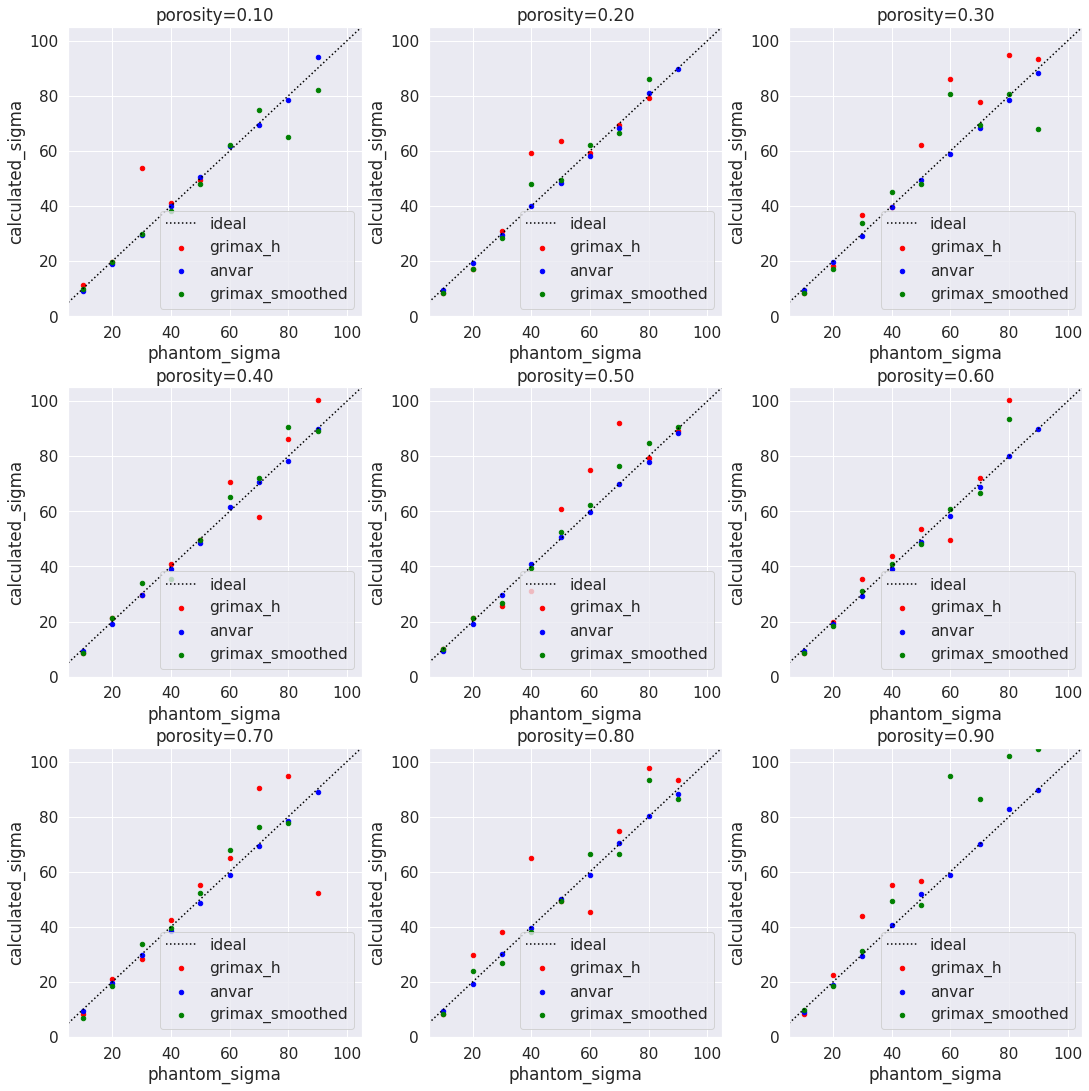

In [19]:
porosities = df.phantom_porosity.unique()

ncols = 3
nrows = len(porosities)//ncols + len(porosities)%ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows), constrained_layout=True)
axes = axes.flatten()

for p, ax in zip(porosities, axes):
    df_p = df.groupby("phantom_porosity").get_group(p)
    for method, c in zip(["grimax_h", "anvar", "grimax_smoothed"], ["red", "blue", "green"]):
        #polyfit
        equation = ""
        # if method == "anvar":
        #     x = df_p.groupby("method_name").get_group(method).phantom_sigma.to_numpy()
        #     y = df_p.groupby("method_name").get_group(method).calculated_sigma.to_numpy()
        #     fit = np.polyfit(x, y, 1)
        #     x_new = np.linspace(10, 35)
        #     ax.plot(x_new, x_new*fit[0]+fit[1], color='blue', linestyle="dotted")
        #     equation = f"{fit[1]:.2f}+{fit[0]:.2f}x"

        df_p.groupby("method_name").get_group(method).plot(kind="scatter",
                                                           x="phantom_sigma",
                                                           y="calculated_sigma",
                                                           ax=ax,
                                                           label=method+equation,
                                                           color=c)
        ax.set_title(f"porosity={p:.2f}")
        ax.set_ylim(0, 105)
        ax.set_xlim(5, 105)
    
    x = np.linspace(5, 105)
    ax.plot(x, x, color='black', linestyle="dotted", label="ideal")
    ax.legend()


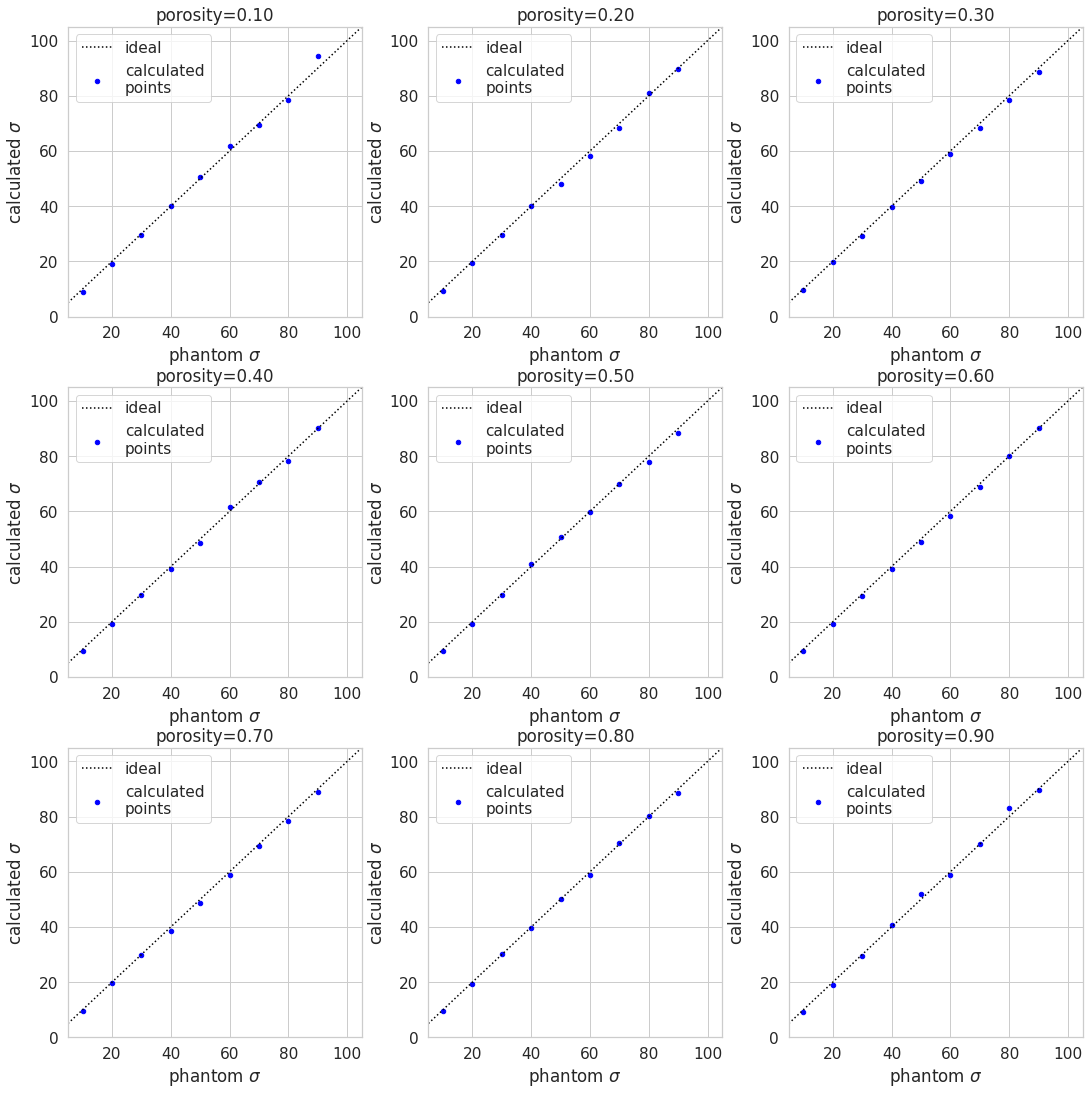

In [32]:
porosities = df.phantom_porosity.unique()

ncols = 3
nrows = len(porosities)//ncols + len(porosities)%ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows), constrained_layout=True)
axes = axes.flatten()

for p, ax in zip(porosities, axes):
    df_p = df.groupby("phantom_porosity").get_group(p)
    for method, c in zip(["anvar"], ["blue"]):
        #polyfit
        equation = ""
        # if method == "anvar":
        #     x = df_p.groupby("method_name").get_group(method).phantom_sigma.to_numpy()
        #     y = df_p.groupby("method_name").get_group(method).calculated_sigma.to_numpy()
        #     fit = np.polyfit(x, y, 1)
        #     x_new = np.linspace(10, 35)
        #     ax.plot(x_new, x_new*fit[0]+fit[1], color='blue', linestyle="dotted")
        #     equation = f"{fit[1]:.2f}+{fit[0]:.2f}x"

        df_p.groupby("method_name").get_group(method).plot(kind="scatter",
                                                           x="phantom_sigma",
                                                           y="calculated_sigma",
                                                           ax=ax,
                                                           label="calculated\npoints",
                                                           color=c)
        ax.set_title(f"porosity={p:.2f}")
        ax.set_ylim(0, 105)
        ax.set_xlim(5, 105)
        ax.set_ylabel("calculated $\sigma$")
        ax.set_xlabel("phantom $\sigma$")
    
    x = np.linspace(5, 105)
    ax.plot(x, x, color='black', linestyle="dotted", label="ideal")
    ax.legend()


# Precision

In [24]:
df.groupby("method_name").get_group("grimax_smoothed").deviation_percent.mean()

10.04167085088089

In [25]:
df.groupby("method_name").get_group("anvar").deviation_percent.mean()

2.5133421020251783

In [28]:
df.groupby("method_name").get_group("anvar").processing_time_seconds.mean()

17.944188893761165

In [27]:
df.groupby("method_name").get_group("grimax_smoothed").processing_time_seconds.mean()


0.224038590044703

In [9]:
method = "grimax"
x = df.groupby("method_name").get_group(method).phantom_sigma.to_numpy()
y = df.groupby("method_name").get_group(method).calculated_sigma.to_numpy()
((x - y)**2).mean(axis=0)


101.9306913354865

In [10]:
method = "grimax_gaus"
x = df.groupby("method_name").get_group(method).phantom_sigma.to_numpy()
y = df.groupby("method_name").get_group(method).calculated_sigma.to_numpy()
((x - y)**2).mean(axis=0)

278.20001420742216

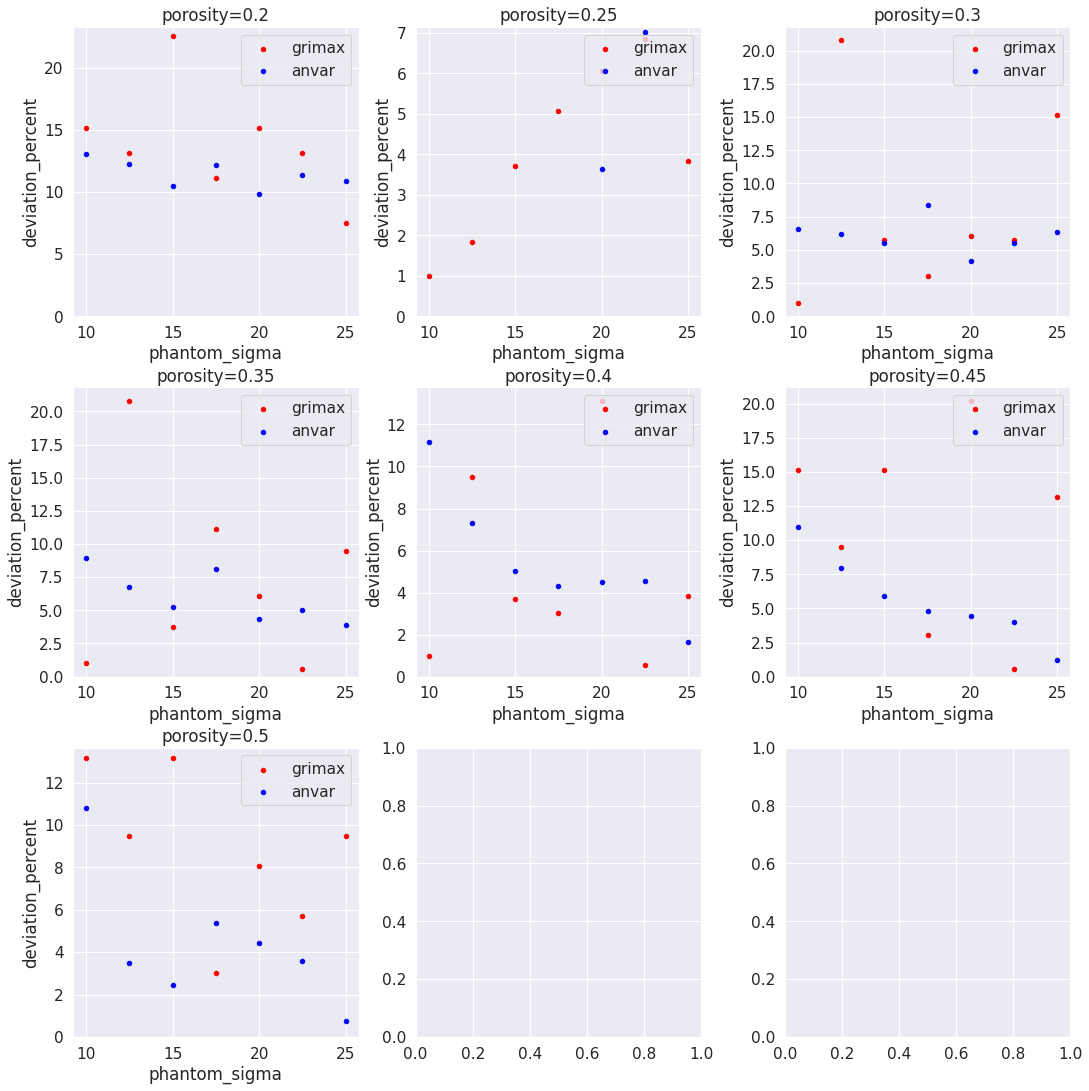

In [11]:
porosities = df.phantom_porosity.unique()

ncols = 3
nrows = len(porosities)//ncols + len(porosities)%ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows), constrained_layout=True)
axes = axes.flatten()

for p, ax in zip(porosities, axes):
    df_p = df.groupby("phantom_porosity").get_group(p)
    for method, c in zip(["grimax", "anvar"], ["red", "blue"]):
        #polyfit
        df_p.groupby("method_name").get_group(method).plot(kind="scatter",
                                                           x="phantom_sigma",
                                                           y="deviation_percent",
                                                           ax=ax,
                                                           label=method,
                                                           color=c)
        ax.set_title(f"porosity={p}")
        ax.set_ylim(ymin=0)

    ax.legend(loc=1)


In [55]:
import phantom_generator as pg
import random

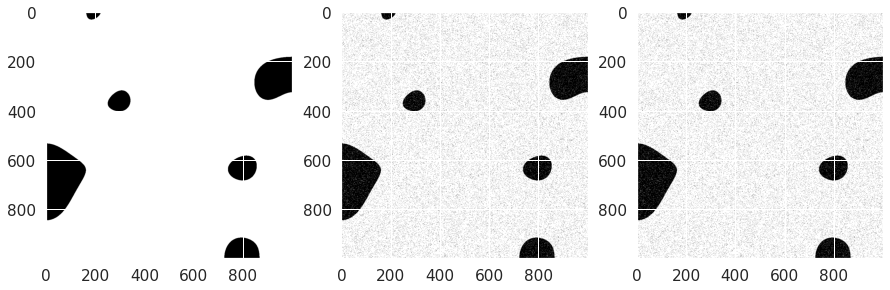

In [67]:
def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 1
            else:
                output[i][j] = image[i][j]
    return output

fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
phantom = pg.gen_phantom([1000, 1000], 0.1, 80)
axes[0].imshow(phantom, cmap="gray")

norm = lambda x: (x - x.min()) / (x.max() - x.min())
#phantom_noised = np.asarray([norm(row+np.random.normal(10,0.1,row.size)) for row in phantom])
phantom_noised = sp_noise(phantom, prob=0.05)
axes[1].imshow(phantom_noised, cmap="gray")

phantom_noised_bin = phantom_noised>0.5
axes[2].imshow(phantom_noised_bin, cmap="gray", interpolation=None)

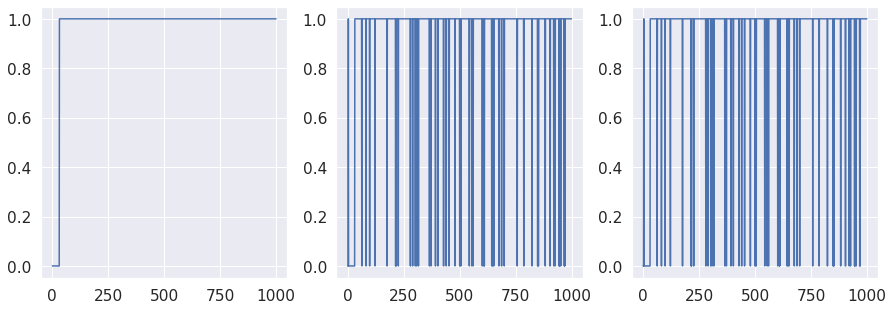

In [68]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
sec = 840
axes[0].plot(phantom[sec])
axes[1].plot(phantom_noised[sec])
axes[2].plot(phantom_noised_bin[sec])